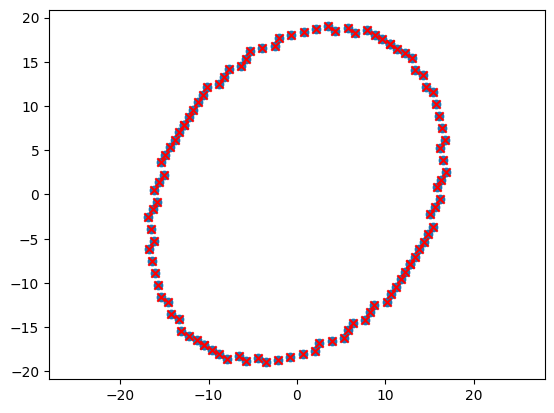

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def rotate_ellipse(a, b, theta):
    x = 0
    y = b

    points = []  # Initialize a list to store the points in the ellipse
    a_sqr = a * a  # Precalc for saving computation time
    b_sqr = b * b
    a_sqr2 = 2 * a_sqr
    b_sqr2 = 2 * b_sqr
    p1 = b_sqr - b * a_sqr + 1 / 4 * a_sqr  # Given by the properties of the ellipse, p of the first section
    dx = 0  # Initialize the step in the x direction
    dy = a_sqr2 * b

    # Lower region mirror
    while dx < dy:
        points.extend([
            (x * np.cos(theta) - y * np.sin(theta), x * np.sin(theta) + y * np.cos(theta)),
            (-x * np.cos(theta) - y * np.sin(theta), -x * np.sin(theta) + y * np.cos(theta)),
            (x * np.cos(theta) + y * np.sin(theta), x * np.sin(theta) - y * np.cos(theta)),
            (-x * np.cos(theta) + y * np.sin(theta), -x * np.sin(theta) - y * np.cos(theta))
        ])
        x += 1
        dx += b_sqr2
        if p1 < 0:
            p1 += dx + b_sqr
        else:
            y -= 1
            dy -= a_sqr2
            p1 += dx + b_sqr - dy

    # Upper region mirror
    p2 = b_sqr * (x + 1 / 2) ** 2 + a_sqr * (y - 1) ** 2 - a_sqr * b_sqr  # p of the upper section
    while y >= 0:
        points.extend([
            (x * np.cos(theta) - y * np.sin(theta), x * np.sin(theta) + y * np.cos(theta)),
            (-x * np.cos(theta) - y * np.sin(theta), -x * np.sin(theta) + y * np.cos(theta)),
            (x * np.cos(theta) + y * np.sin(theta), x * np.sin(theta) - y * np.cos(theta)),
            (-x * np.cos(theta) + y * np.sin(theta), -x * np.sin(theta) - y * np.cos(theta))
        ])
        y -= 1
        dy -= a_sqr2

        if p2 > 0:
            p2 += a_sqr - dy
        else:
            x += 1
            dx += b_sqr2
            p2 += a_sqr - dy + dx

    return np.array(points)

# Test
points = rotate_ellipse(20, 15, 45)  # Create a rotated ellipse at 45 degrees

plt.scatter(points[:, 0], points[:, 1])
plt.scatter(points[:, 0], points[:, 1], c='r', marker='x')

plt.axis('equal')  # Set the aspect ratio to be equal
plt.show()
